In [1]:
import numpy as np
from tensorflow import keras
from matplotlib import pyplot as plt

In [2]:
model = keras.models.load_model('mnist_model.h5')

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_test = np.concatenate((x_train, x_test))
y_test = np.concatenate((y_train, y_test))
x_test = x_test.reshape(70000, 784).astype('float32')/255

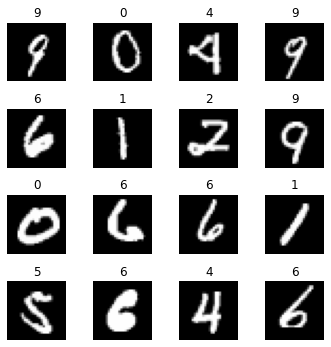

In [4]:
def plot_mnist(x: np.ndarray, ax=plt):
    x = x.reshape(28, 28)
    ax.imshow(x, cmap='gray')


rows = 4
columns = 4
size = 1.2

x_test_temp = np.copy(x_test)
np.random.shuffle(x_test_temp)
fig, ax = plt.subplots(rows, columns, figsize=(columns*size, rows*size))
fig.tight_layout(pad=0.1*size)
for i in range(rows):
    for j in range(columns):
        x = x_test_temp[i*columns+j]
        plot_mnist(x, ax=ax[i, j])
        y = np.argmax(model.predict(x.reshape(1, 28**2)))
        ax[i, j].axis('off')
        ax[i, j].set_title(y)

plt.show()
